<a href="https://colab.research.google.com/github/oansari03/DS-Unit-2-Linear-Models/blob/master/DS_2.12_guided_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries for R^2 visualization
from ipywidgets import interactive, IntSlider, FloatSlider
from math import floor, ceil
from sklearn.base import BaseEstimator, RegressorMixin

# Libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Library for working locally or Colab
import sys

In [ ]:
# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# I. Wrangle Data

In [ ]:
def wrangle(filepath):
  # Create new column names for easy handling
  col_names = ['year', 'incumbent', 'challenger', 'income', 'fatalities', 'incumbent_vote_share']
  df=pd.read_csv(filepath,
                 header = 0,
                 names=col_names,
                 index_col='year')
  
  # drop high cardinality categorical columns
  threshold = 10
  cols_to_drop = []

  for col in df:
    if df[col].dtype == 'object':
      if df[col].nunique() > threshold:
        cols_to_drop.append(col)

  df.drop(columns=cols_to_drop, inplace=True)

  return df

df = wrangle(DATA_PATH + 'elections/bread_peace_voting.csv')

In [ ]:
df.head()

,incumbent,challenger,income,fatalities,incumbent_vote_share
year,,,,,
1952,Stevenson,Eisenhower,2.40,190,44.60
1956,Eisenhower,Stevenson,2.89,0,57.76
1960,Nixon,Kennedy,0.85,0,49.91
1964,Johnson,Goldwater,4.21,1,61.34
1968,Humphrey,Nixon,3.02,146,49.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1952 to 2016
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   incumbent             17 non-null     object 
 1   challenger            17 non-null     object 
 2   income                17 non-null     float64
 3   fatalities            17 non-null     int64  
 4   incumbent_vote_share  17 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 816.0+ bytes


In [ ]:
threshold = 10
cols_to_drop = []
for col in df:
  if df[col].dtype == 'object':
    if df[col].nunique() > threshold:
      cols_to_drop.append(col)



In [ ]:
df.head()

,income,fatalities,incumbent_vote_share
year,,,
1952,2.40,190,44.60
1956,2.89,0,57.76
1960,0.85,0,49.91
1964,4.21,1,61.34
1968,3.02,146,49.60


# II. Split Data

**First** we need to split our **target vector** from our **feature matrix**.

In [ ]:
# y = df['incumbent_vote_share']
# X = df[['income', 'fatalities']]

In [ ]:
# Define our feature X and target y
target = 'incumbent_vote_share'
y = df[target]
X = df.drop(columns=target)

**Second** we need to split our dataset into **training** and **test** sets.

Two strategies:

- Random train-test split using [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Generally we use 80% of the data for training, and 20% of the data for testing.
- If you have **timeseries**, then you need to do a "cutoff" split.

In [ ]:
# Random train-test-split
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
# Time-Series train-test-split
cut_off = 2004

mask = X.index < 2004

X_train = X.loc[mask]
y_train = y.loc[mask]

X_test = X.loc[~mask]
y_test = y.loc[~mask]

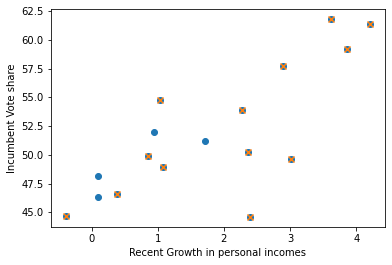

In [ ]:
# # plotting the data 

plt.scatter(X['income'], y)
plt.scatter(X_train['income'],y_train,marker = 'x')
plt.xlabel('Recent Growth in personal incomes')
plt.ylabel('Incumbent Vote share');

# III. Establish Baseline

In [ ]:
y_pred = y_train.mean()
baseline_mae = [y_train.mean()] * len(y)

print('Mean Vote Share:',y_pred )
print('Baseline MAE:',baseline_mae)

# IV. Build Model

In [ ]:
# Step 1: Import your predictor class
# We did that above ☝️

# Step 2: Instantiate your predictor 
model = LinearRegression()

# Step 3: Fit your model  # TRAINING DATA
model.fit(X_train,y_train)

LinearRegression()

# V. Check Metrics

## Mean Absolute Error

The unit of measurement is the same as the unit of measurment for your target (in this case, vote share [%]).

<img src=https://miro.medium.com/max/315/1*OVlFLnMwHDx08PHzqlBDag.gif />

In [ ]:
print('Training MAE:', mean_absolute_error(y_train, model.predict(X_train)) )
print('Test MAE:', mean_absolute_error(y_test, model.predict(X_test)))

Training MAE: 1.3737002516876717
Test MAE: 1.4133453705003944


## Root Mean Squared Error

The unit of measurement is the same as the unit of measurment for your target (in this case, vote share [%]).

<img src= https://miro.medium.com/max/327/1*9hQVcasuwx5ddq_s3MFCyw.gif />

In [ ]:
print('Training RMSE:', mean_squared_error(y_train, model.predict(X_train), squared=False))
print('Test RMSE:',mean_squared_error(y_test, model.predict(X_test), squared=False) )

Training RMSE: 2.0376005753896838
Test RMSE: 1.623765003537601


## $R^2$ Score

TL;DR: Usually ranges between 0 (bad) and 1 (good).

In [ ]:
# r2 = 1 - (model_SS_error)/ (baseline_SS_error)

<img src=https://miro.medium.com/max/287/1*H3D-sstHHXEPEtZuntFu7Q.png width="250" />

In [ ]:
# Training r2
print("R-Squared:", r2_score(y_train, model.predict(X_train)) )
# Test r2
print("R-Squared:", r2_score(y_test, model.predict(X_test)) )

R-Squared: 0.8759203630180873
R-Squared: 0.4993519697110995


In [ ]:
# Training r2
print("R-Squared:", model.score(X_train, y_train))
# Test r2
print("R-Squared:", model.score(X_test, y_test))

R-Squared: 0.8759203630180873
R-Squared: 0.4993519697110995


In [ ]:
class BruteForceRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, m=0, b=0):
        self.m = m
        self.b = b
        self.mean = 0
        
    def fit(self, X, y):
        self.mean = np.mean(y)
        return self
    
    def predict(self, X, return_mean=True):
        if return_mean:
            return [self.mean] * len(X)
        else:
            return X * self.m + self.b

def plot(slope, intercept):
    # Assign data to variables
    x = df['income']
    y = df['incumbent_vote_share']
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    
    # Set ax limits
    mar = 0.2
    x_lim = floor(x.min() - x.min()*mar), ceil(x.max() + x.min()*mar)
    y_lim = floor(y.min() - y.min()*mar), ceil(y.max() + y.min()*mar)
    
    # Instantiate and train model
    bfr = BruteForceRegressor(slope, intercept)
    bfr.fit(x, y)
    
    # ax1   
    ## Plot data
    ax1.set_xlim(x_lim)
    ax1.set_ylim(y_lim)
    ax1.scatter(x, y)
    
    ## Plot base model
    ax1.axhline(bfr.mean, color='orange', label='baseline model')
    
    ## Plot residual lines
    y_base_pred = bfr.predict(x)
    ss_base = mean_squared_error(y, y_base_pred) * len(y)
    for x_i, y_i, yp_i in zip(x, y, y_base_pred):
        ax1.plot([x_i, x_i], [y_i, yp_i], 
                 color='gray', linestyle='--', alpha=0.75)
    
    ## Formatting
    ax1.legend()
    ax1.set_title(f'Sum of Squares: {np.round(ss_base, 2)}')
    ax1.set_xlabel('Growth in Personal Incomes')
    ax1.set_ylabel('Incumbent Party Vote Share [%]')

    # ax2

    ax2.set_xlim(x_lim)
    ax2.set_ylim(y_lim)
    ## Plot data
    ax2.scatter(x, y)
    
    ## Plot model
    x_model = np.linspace(*ax2.get_xlim(), 10)
    y_model = bfr.predict(x_model, return_mean=False)
    ax2.plot(x_model, y_model, color='green', label='our model')
    for x_coord, y_coord in zip(x, y):
        ax2.plot([x_coord, x_coord], [y_coord, x_coord * slope + intercept], 
                 color='gray', linestyle='--', alpha=0.75)   
    
    ss_ours = mean_squared_error(y, bfr.predict(x, return_mean=False)) * len(y)
    
    ## Formatting
    ax2.legend()
    ax2.set_title(f'Sum of Squares: {np.round(ss_ours, 2)}')
    ax2.set_xlabel('Growth in Personal Incomes')
    ax2.set_ylabel('Incumbent Party Vote Share [%]')

y = df['incumbent_vote_share']
slope_slider = FloatSlider(min=-5, max=5, step=0.5, value=0)
intercept_slider = FloatSlider(min=int(y.min()), max=y.max(), step=2, value=y.mean())
    
interactive(plot, slope=slope_slider, intercept=intercept_slider)

interactive(children=(FloatSlider(value=0.0, description='slope', max=5.0, min=-5.0, step=0.5), FloatSlider(va…

In [ ]:
# r2 = 1 - (model_SS_error)/ (baseline_SS_error)
# 1 - (241/485) # r2 > 0, model better than baseline
1 - (485/ 485) # r2 = 0, model equal to baseline
1 - (3824/ 485) # r2 < 0, model worse than baseline

# VI. Communicate Results

**Challenge:** How can we find the coefficients and intercept for our `model`?

In [ ]:
model.coef_

array([ 3.57690447, -0.05355141])

>most important feature = Fatalities

>You should consider the absolute value of each coefficient, so that it doesn't matter if it's positive or negative.

In [ ]:
print('The coefficient for income is:',model.coef_[0]) 
print('The coefficient for fatalities is:',model.coef_[1])

The coefficient for income is: 3.5769044691079976
The coefficient for fatalities is: -0.05355141496518978


In [ ]:
print('The interecept of our model is:',model.intercept_)

The interecept of our model is: 46.36824118234689
